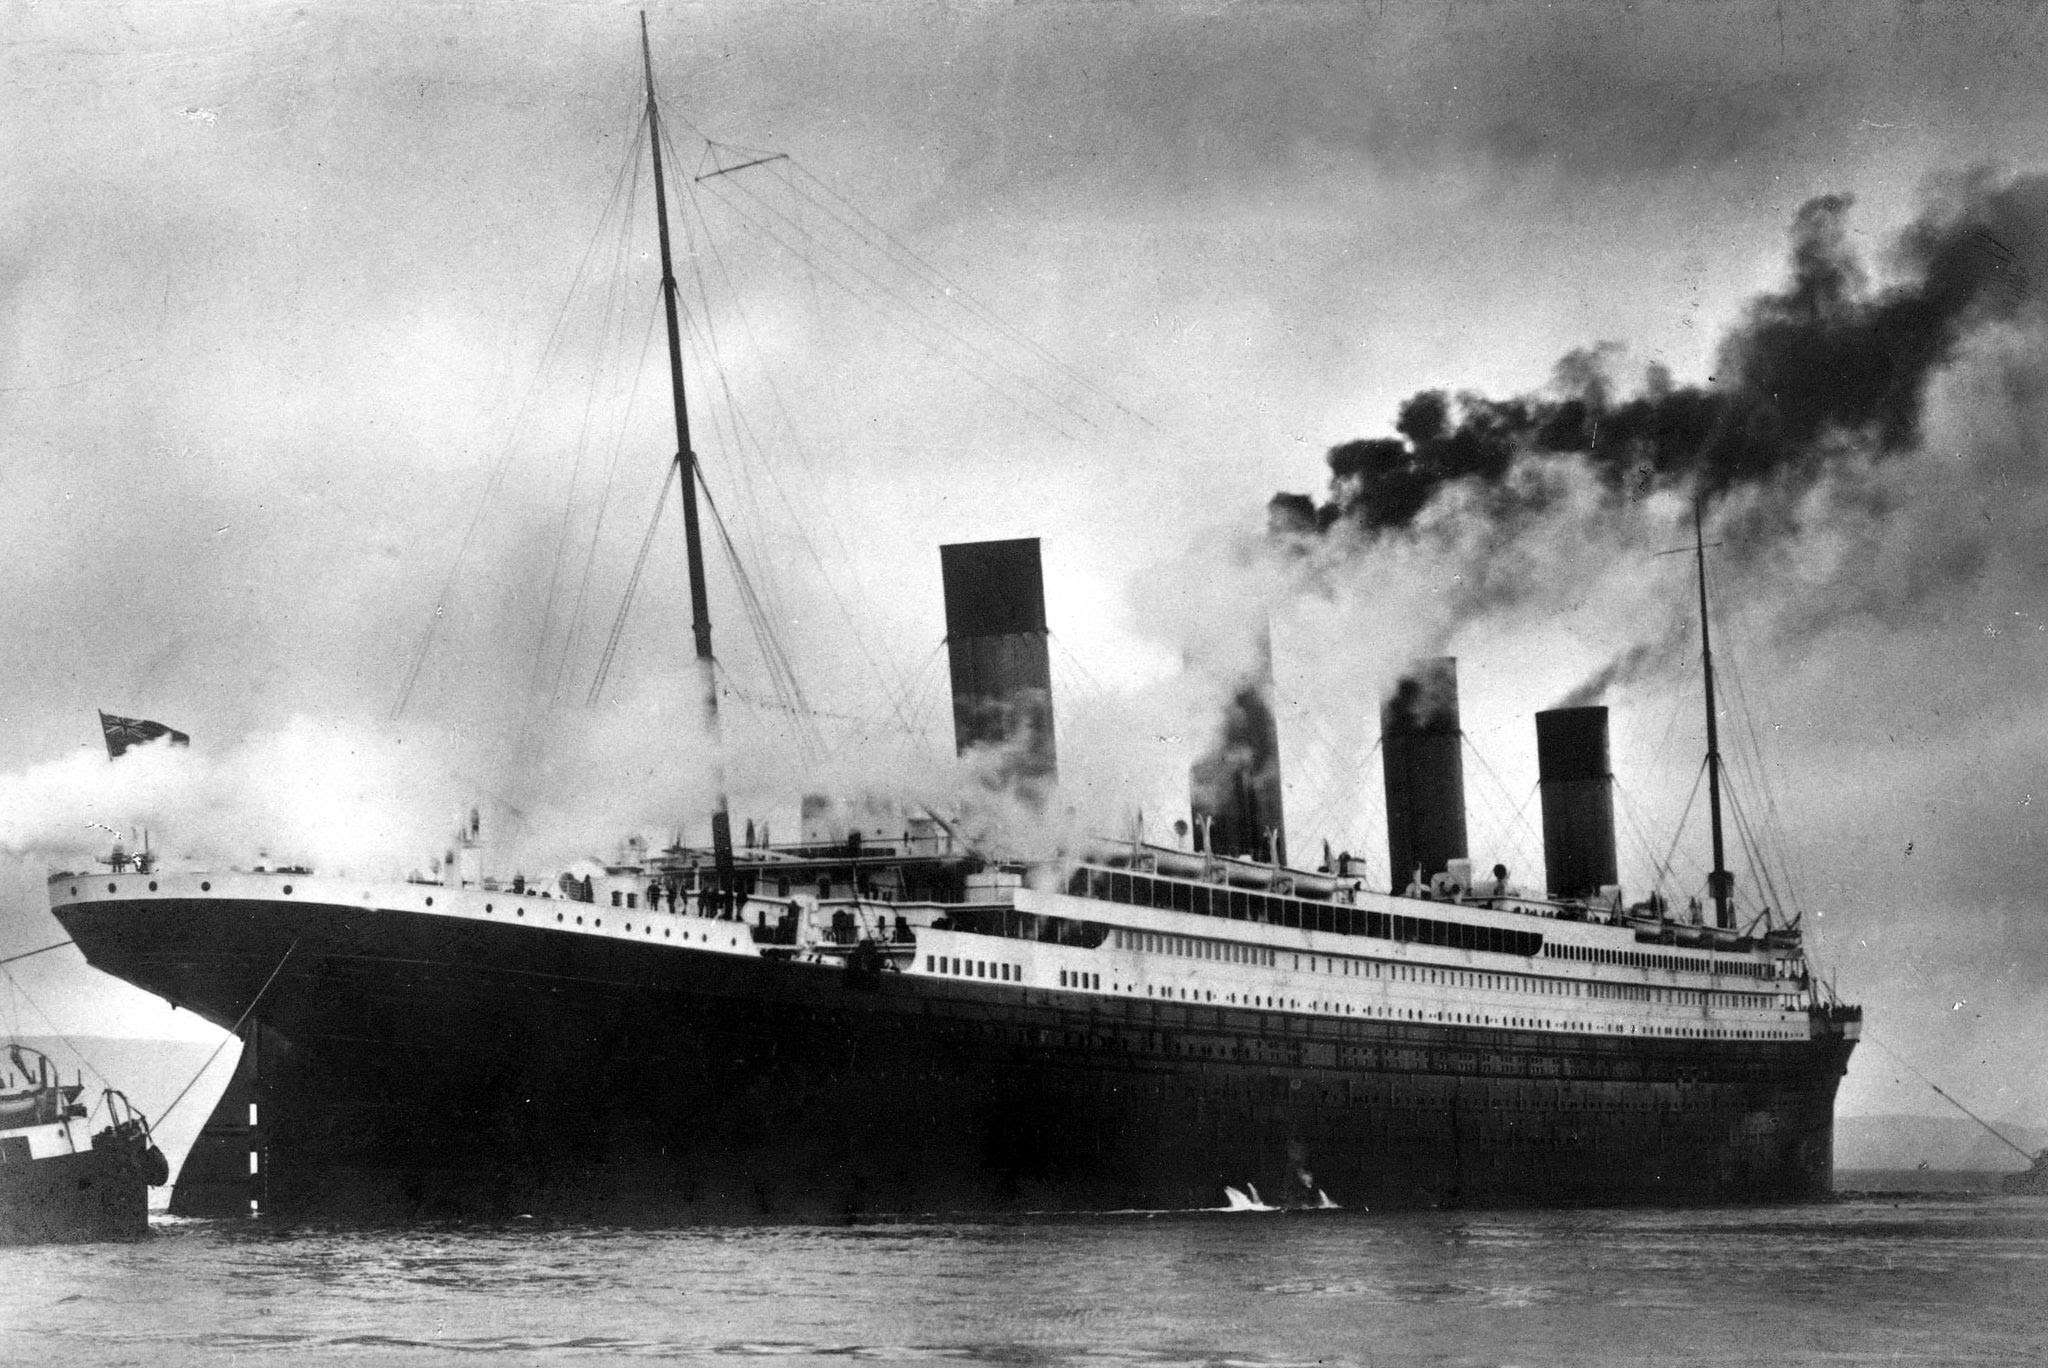

# Titanic Case Study
---
Dataset Link :

https://drive.google.com/file/d/1rvAMFWnuKzxf-Wg0I5tYXkSMoRMLdAgN/view?usp=drive_link


In [ ]:
# libraries for maths and analysis
import pandas as pd
import numpy as np

# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# fixing warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Create the dataframe
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Data Understanding

# Survived :        1 means Survived   ,  0 means Not Survived
# Pclass   :        1 means upper class , 2 means middle class , 3 means lower class
# Name  , Sex  an Age , they are self explantory
# SibSp    :  is the total number of passengers siblings and spouse
# Parch     : is the total number of passengers , parents and childrens
# Ticket
# Fare
# Cabin
# Embarked : is port of embarktion , from which location the passenger boarded the ship

In [ ]:
df.Embarked.unique().tolist()

['S', 'C', 'Q', nan]

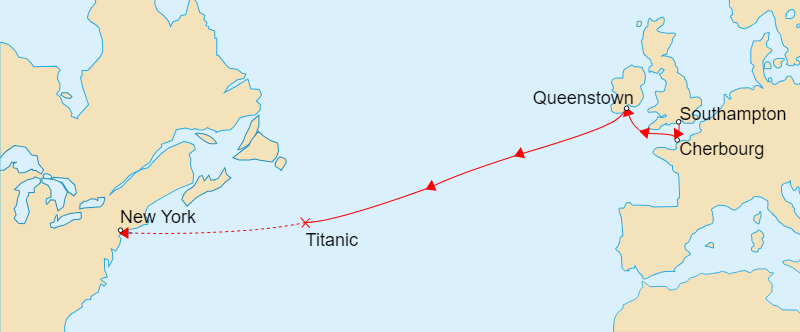

In [ ]:
# Next Step : After Data Understanding IN EDA You will Do [ Data Inspection ]
# ---

In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
# Age

# Count : we have Age Data Available for 714 Passengers.
# mean  : The Average Age of Passenger is 29 Years.
# std   : Most Passengers Fall in the Age Range of (mean-std)Age and (mean+std) age i.e (29-14)years to (29+14) years
# i.e 15 years to 43 Years.

# min : The Youngest Passenger on Ship is 0.4 Years old that mean s there is a baby(infant) on ship.
# 25%(Quantile 1) : 25% of Passengers  are of Age 20 or younger.
# 50%(Quantile 2) : 50% is also called Median , it means 50% of passengers are younger then 28Yrs Age.
# which also means remaining 50% Pasengers age is greater then 28 years
# 75(Quantile 3)  : 75% of the Passengesr are younger then 38 Years.
# Max             : The Oldest Person on Ship is 80 Years old.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# let us find the exact count of missing values

In [ ]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# Do you find columns like 'PassengerID','Name','Ticket' to be of higher interest for Analysis?

In [ ]:
# Dropping the unnecessary columns is a part of Data Cleaning (in EDA)

df.drop ( ['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

In [ ]:
# Eliminating Duplicates

In [ ]:
# inplace=True , saves the changes in original dataframe
# without inplace a new subdataframe is returned by function leaving the original dataframe unaffected with changes.

In [ ]:
len(df)

891

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

784

In [ ]:
# can u find the null count again ?

In [ ]:
df.isna().sum().sort_values(ascending=False)

Cabin       581
Age         106
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
# please note: in order to decide whether we will drop column or Impute Column we need to find

# what %age of NaN values are there in each Column.

In [ ]:
# what %age of Missing Values are there in Cabin Column ?

In [ ]:
100 * ( 581 / 784)

74.10714285714286

In [ ]:
# Cabin Missing %age

100 * ( df.Cabin.isna().sum() / len(df))

74.10714285714286

In [ ]:
# What %age of missing values are there in Age and Embarked Column ?

In [ ]:
# Age Missing %age

100 * ( df.Age.isna().sum() / len(df))

13.520408163265307

In [ ]:
# Embarked Missing %age

100 * ( df.Embarked.isna().sum() / len(df))

0.25510204081632654

# Here are the Notes :

  - we have 13% of Missing values in Age Column : we will Impute Age Column.
  - we have 74% of Missing values in Cabin Column : dropping Cabin Column is suggested.
  - we have -.25% of Missing values in Embarked  Column : Delete 0.25% of Data is Suggested here.

In [ ]:
# droping the cabin column

In [ ]:
df.drop(['Cabin'], axis=1,inplace=True);

In [ ]:
# dropping the Rows where Embarked Column Contains NaN

In [ ]:
df.dropna(subset=['Embarked'],inplace=True)

In [ ]:
# can u check null count again ?

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
# Suppose we have Age data of Students from Class 1 to Class 12

# In Each class (from class 1 to 12 ) Age info for some students is Missing.


# To Fill the NaN  for Class 1 Students, Taking the Mean of Age from class 1 to 12 will be a correct decision or not ?

In [ ]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         34.365854
        2         28.429577
        3         21.957921
male    1         41.281386
        2         31.083295
        3         26.576910
Name: Age, dtype: float64

In [ ]:
# if age info for Male from 2nd Passenger is Missing i will use ? avarege Age to fill his Age Value.

In [ ]:
df['Age'] = df.groupby(['Sex','Pclass']).Age.apply( lambda row : row.fillna(row.mean()))

In [ ]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
  pd.__version__

'1.5.3'

# Let us Find the Data Imbalance %age
---

In [ ]:
df.Survived.value_counts()

0    461
1    321
Name: Survived, dtype: int64

In [ ]:
df.Survived.value_counts(normalize=True) * 100

0    58.951407
1    41.048593
Name: Survived, dtype: float64

In [ ]:
# inference: 58% passengers couldn't survive whereas 41% passengers survived.

# Let us Observe/Analyse the Age Distribution
---

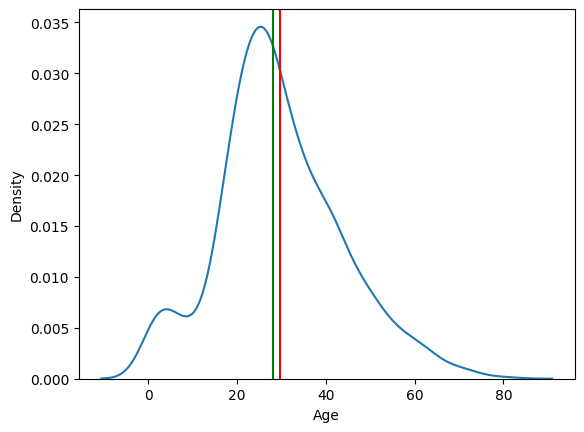

In [ ]:
sns.distplot(df['Age'],hist=False)
plt.axvline(df['Age'].mean(),color='r')
plt.axvline(df['Age'].median(),color='g')
plt.show()

# Let us use CountPlot() to visualise the Frequency Distribution
---

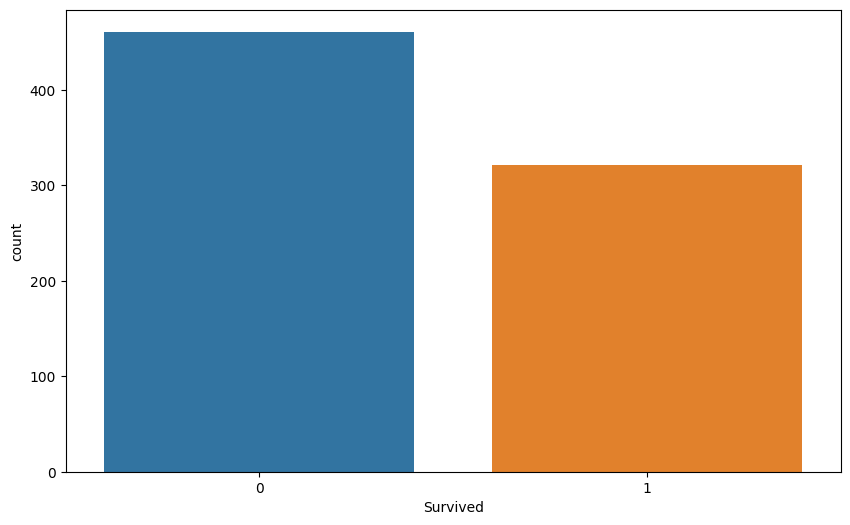

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=df)
plt.show()

# Try using CountPlot to find out the Passengers Distribution By their Passenger Class
---
Please share your observation in Chat Section.

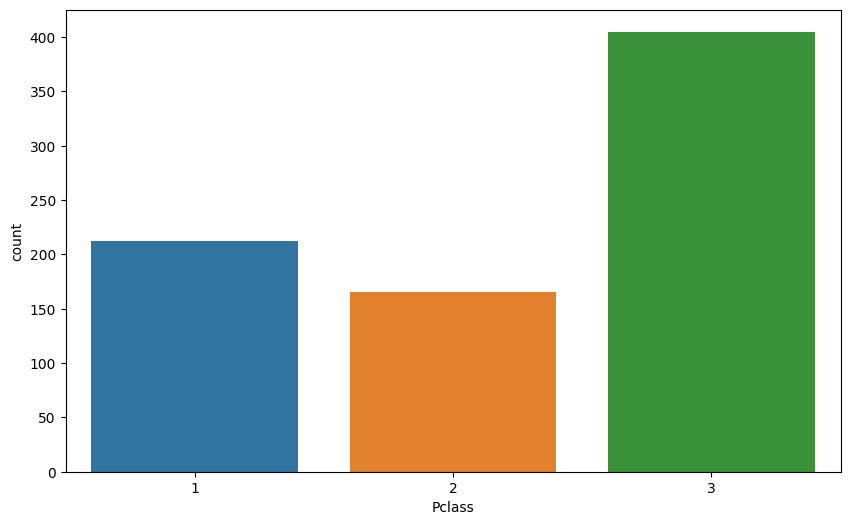

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',data=df)
plt.show()

# Try using CountPlot to find out the Passengers Distribution By their Boarding Location
---
Please share your observation in Chat Section.

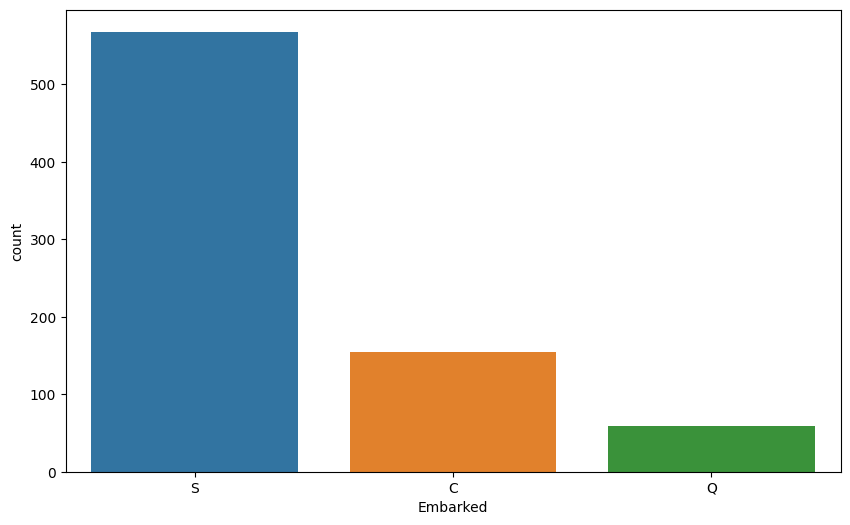

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked',data=df)
plt.show()

# Let us Find the Passenger Distribution by Passenger Class & Surivival
---

hue

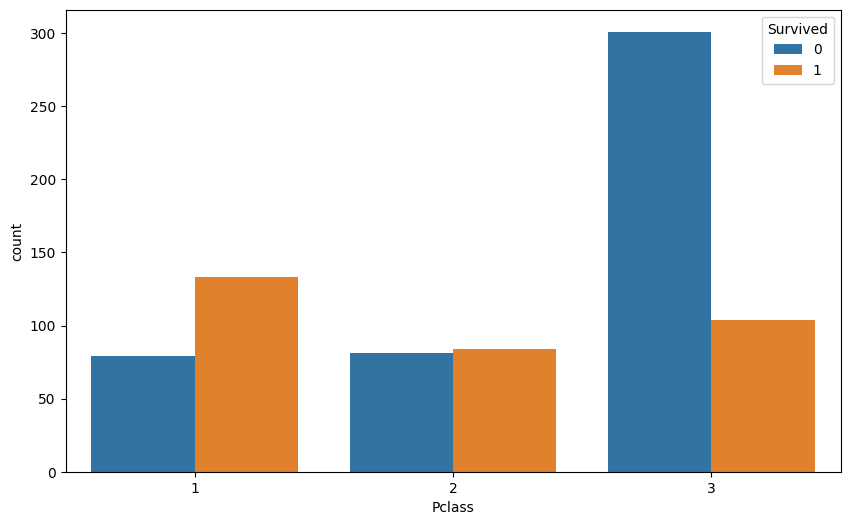

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot( x='Pclass', hue='Survived',data=df)
plt.show()

# Activity :  Find the Passenger Distribution by Gender & Surivival
---

please share observation in Chat

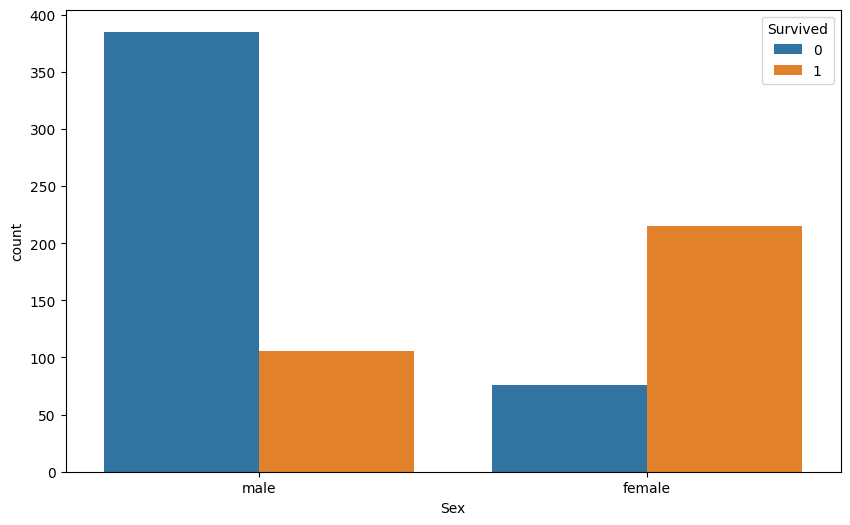

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot( x='Sex', hue='Survived',data=df)
plt.show()

# Activity :  Find the Passenger Distribution by Boarding Location & Surivival
---

please share observation in Chat

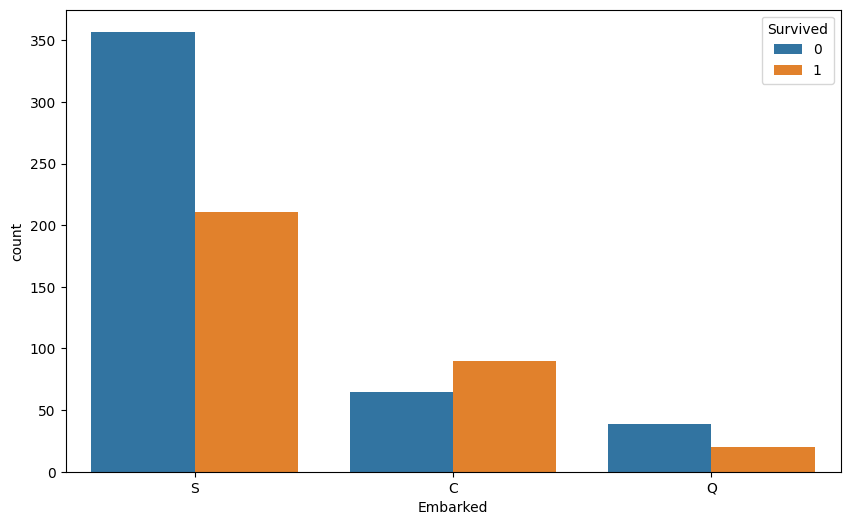

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot( x='Embarked', hue='Survived',data=df)
plt.show()

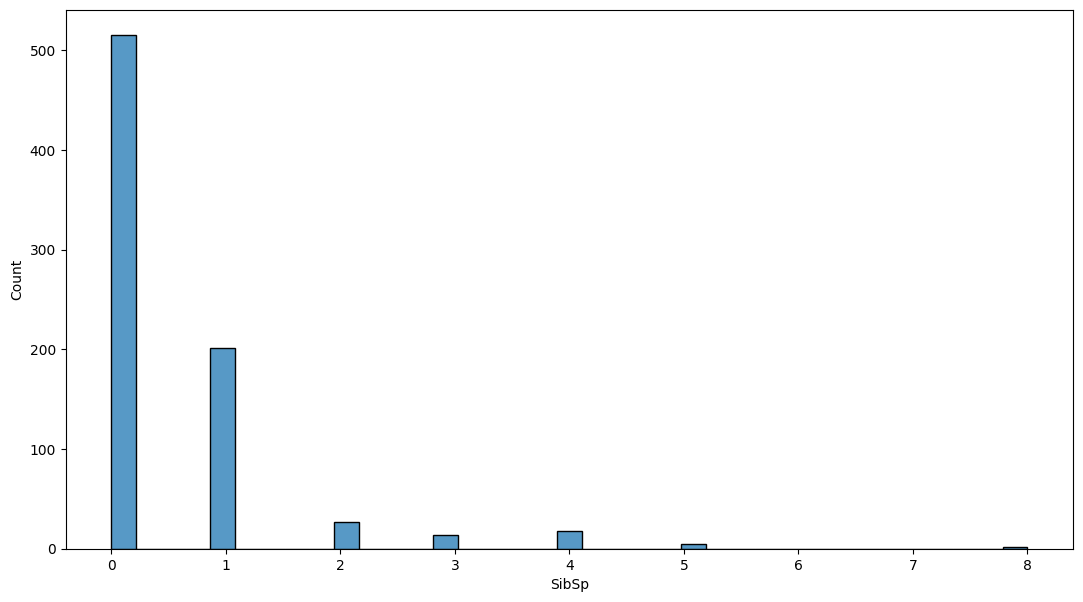

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(df['SibSp'])
plt.show()

In [ ]:
# In Order to Conclude if Most People were travelling Solo , can you find the Frequency Distribution (histplot) for Parent and Childeren
# please share your observation in Chat.

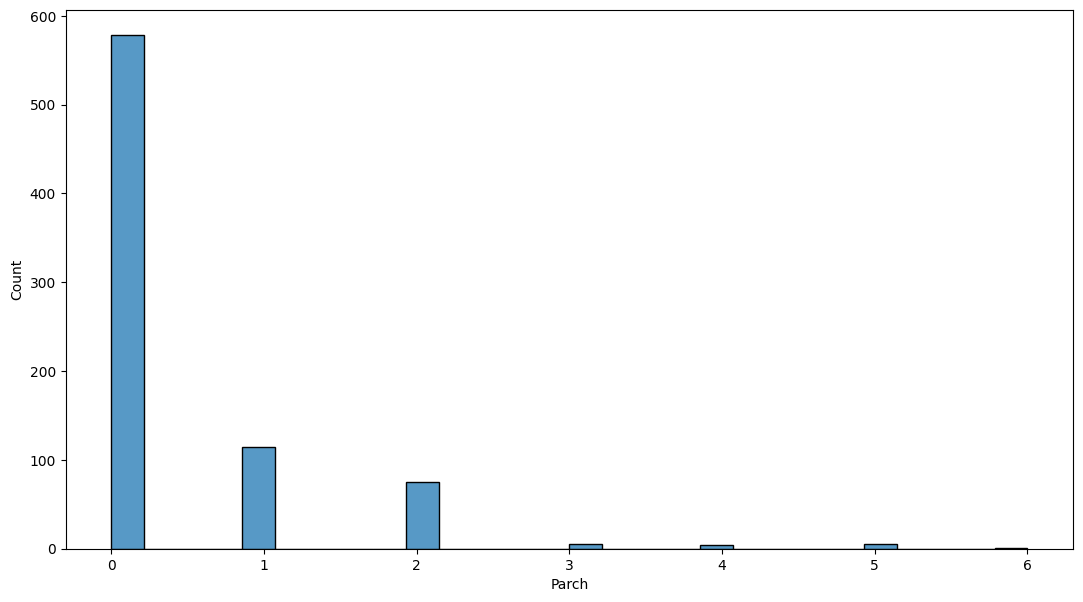

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(df['Parch'])
plt.show()

# let us Observe the Fair Distribution using SwarmPlot
---

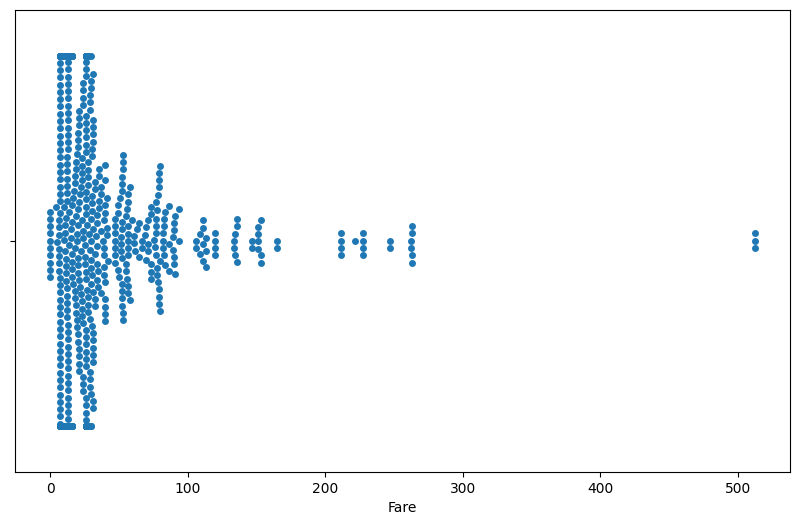

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot( x= df['Fare'])
plt.show()

# Let us use the Correlation Matrix to find the Relation (positive/negative/neutral) between the variables
---

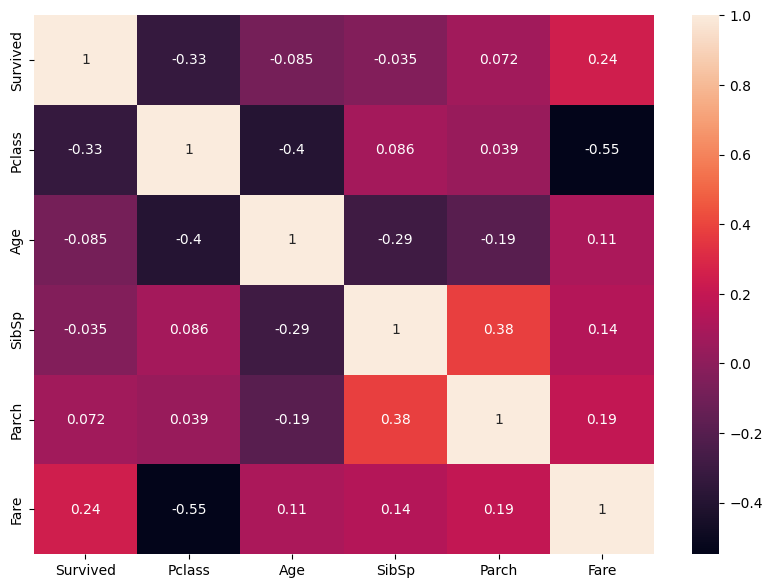

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap( df.corr() , annot=True)
plt.show()

# Last Plot
---

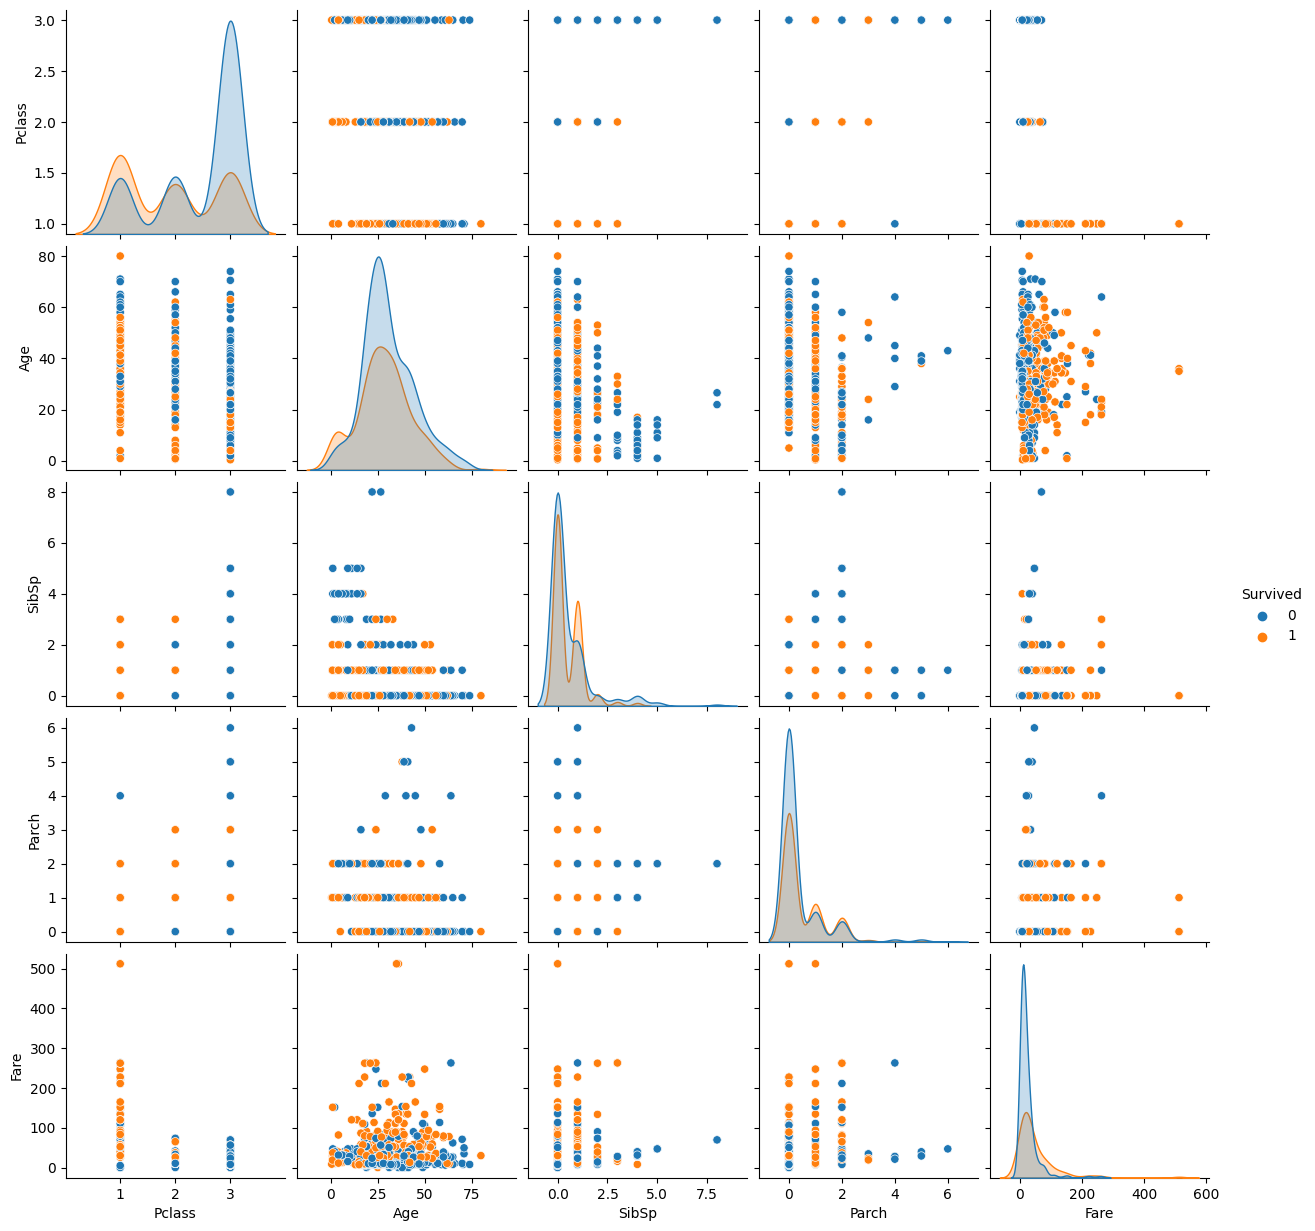

In [ ]:
sns.pairplot(hue='Survived',data=df)
plt.show()

## Final Report
    - The Higher the Class -> The higher the Survival Rate
    - Females have Higher survival Rate compared to Man

In [ ]:
# End of EDA 😀